In [1]:
import os
import xml.etree.ElementTree as ET
from pathlib import Path
from shutil import copy2

VOC_PATH = Path("/kaggle/input/voc2012/VOCdevkit/VOC2012")
YOLO_PATH = Path("/kaggle/working/VOCYOLO")
classes = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
           'bus', 'car', 'cat', 'chair', 'cow', 'diningtable',
           'dog', 'horse', 'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor']

def convert(filename):  # pass 'train.txt' or 'val.txt'
    image_ids_path = VOC_PATH / 'ImageSets' / 'Main' / filename
    with open(image_ids_path, 'r') as f:
        image_ids = f.read().splitlines()

    split = filename.replace('.txt', '')

    (YOLO_PATH / f'images/{split}').mkdir(parents=True, exist_ok=True)
    (YOLO_PATH / f'labels/{split}').mkdir(parents=True, exist_ok=True)

    for img_id in image_ids:
        xml_file = VOC_PATH / 'Annotations' / f'{img_id}.xml'
        img_file = VOC_PATH / 'JPEGImages' / f'{img_id}.jpg'
        copy2(img_file, YOLO_PATH / f'images/{split}/{img_id}.jpg')

        tree = ET.parse(xml_file)
        root = tree.getroot()
        w = int(root.find('size/width').text)
        h = int(root.find('size/height').text)

        label_file = YOLO_PATH / f'labels/{split}/{img_id}.txt'
        with open(label_file, 'w') as f:
            for obj in root.findall('object'):
                cls = obj.find('name').text
                if cls not in classes:
                    continue
                cls_id = classes.index(cls)
                xmlbox = obj.find('bndbox')
                b = [int(xmlbox.find(tag).text) for tag in ['xmin', 'ymin', 'xmax', 'ymax']]
                xc = (b[0] + b[2]) / 2 / w
                yc = (b[1] + b[3]) / 2 / h
                bw = (b[2] - b[0]) / w
                bh = (b[3] - b[1]) / h
                f.write(f"{cls_id} {xc:.6f} {yc:.6f} {bw:.6f} {bh:.6f}\n")

# Convert both splits
convert('train.txt')
convert('val.txt')

In [ ]:
print(1)

In [4]:
import os

path = "/kaggle/input/voc2012/VOCdevkit/VOC2012/ImageSets/Main"
print("Files in Main/:", os.listdir(path))

Files in Main/: ['diningtable_train.txt', 'person_train.txt', 'boat_trainval.txt', 'sofa_train.txt', 'sheep_train.txt', 'horse_train.txt', 'aeroplane_trainval.txt', 'person_trainval.txt', 'chair_val.txt', 'cat_train.txt', 'dog_trainval.txt', 'val.txt', 'bird_trainval.txt', 'cow_trainval.txt', 'bus_train.txt', 'bird_val.txt', 'bus_trainval.txt', 'horse_val.txt', 'train_val.txt', 'tvmonitor_train.txt', 'bottle_train.txt', 'diningtable_val.txt', 'cat_val.txt', 'dog_train.txt', 'car_train.txt', 'cow_val.txt', 'train_trainval.txt', 'bicycle_train.txt', 'sofa_trainval.txt', 'cow_train.txt', 'diningtable_trainval.txt', 'bird_train.txt', 'bus_val.txt', 'chair_trainval.txt', 'person_val.txt', 'bottle_val.txt', 'pottedplant_trainval.txt', 'car_trainval.txt', 'boat_train.txt', 'motorbike_trainval.txt', 'pottedplant_train.txt', 'aeroplane_train.txt', 'tvmonitor_val.txt', 'chair_train.txt', 'train.txt', 'aeroplane_val.txt', 'tvmonitor_trainval.txt', 'boat_val.txt', 'trainval.txt', 'cat_trainval.txt

In [2]:
yaml_content = """
train: /kaggle/working/VOCYOLO/images/train
val: /kaggle/working/VOCYOLO/images/val

nc: 20
names: ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
        'bus', 'car', 'cat', 'chair', 'cow', 'diningtable',
        'dog', 'horse', 'motorbike', 'person', 'pottedplant',
        'sheep', 'sofa', 'train', 'tvmonitor']
"""

with open('/kaggle/working/voc.yaml', 'w') as f:
    f.write(yaml_content)

In [8]:
# Step 1: Clone the YOLOv5 repo
!git clone https://github.com/ultralytics/yolov5.git

# Step 2: Move into the yolov5 directory
%cd yolov5

# Step 3: Install dependencies
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 17516 (delta 8), reused 0 (delta 0), pack-reused 17494 (from 3)
Receiving objects: 100% (17516/17516), 16.60 MiB | 30.15 MiB/s, done.
Resolving deltas: 100% (11997/11997), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00:00:0100:01

In [10]:
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 5 \
  --data /kaggle/working/voc.yaml \
  --weights yolov5s.pt \
  --name yolov5s_voc

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-07-30 20:12:46.977188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753906367.002007    1601 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753906367.009348    1601 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
wandb: WARNING If you're specifying your api key in code, ensure this code is 

In [11]:
!zip -r /kaggle/working/yolov5s_voc2.zip runs/train/yolov5s_voc2 

  adding: runs/train/yolov5s_voc2/ (stored 0%)
  adding: runs/train/yolov5s_voc2/opt.yaml (deflated 50%)
  adding: runs/train/yolov5s_voc2/labels_correlogram.jpg (deflated 35%)
  adding: runs/train/yolov5s_voc2/results.csv (deflated 78%)
  adding: runs/train/yolov5s_voc2/results.png (deflated 8%)
  adding: runs/train/yolov5s_voc2/val_batch2_labels.jpg (deflated 7%)
  adding: runs/train/yolov5s_voc2/weights/ (stored 0%)
  adding: runs/train/yolov5s_voc2/weights/last.pt (deflated 9%)
  adding: runs/train/yolov5s_voc2/weights/best.pt (deflated 9%)
  adding: runs/train/yolov5s_voc2/train_batch0.jpg (deflated 4%)
  adding: runs/train/yolov5s_voc2/val_batch1_pred.jpg (deflated 9%)
  adding: runs/train/yolov5s_voc2/val_batch0_pred.jpg (deflated 14%)
  adding: runs/train/yolov5s_voc2/val_batch2_pred.jpg (deflated 6%)
  adding: runs/train/yolov5s_voc2/val_batch0_labels.jpg (deflated 15%)
  adding: runs/train/yolov5s_voc2/PR_curve.png (deflated 3%)
  adding: runs/train/yolov5s_voc2/confusion_mat

In [12]:
!python detect.py \
  --weights runs/train/yolov5s_voc2/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /kaggle/working/VOCYOLO/images/val \
  --save-txt --save-conf --name yolov5s_voc2_test

detect: weights=['runs/train/yolov5s_voc2/weights/best.pt'], source=/kaggle/working/VOCYOLO/images/val, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov5s_voc2_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
image 1/5823 /kaggle/working/VOCYOLO/images/val/2008_000002.jpg: 480x640 (no detections), 31.3ms
image 2/5823 /kaggle/working/VOCYOLO/images/val/2008_000003.jpg: 448x640 1 train, 33.3ms
image 3/5823 /kaggle/working/VOCYOLO/images/val/2008_000007.jpg: 480x640 (no detections), 9.

In [13]:
!zip -r /kaggle/working/yolov5s_voc2_test.zip runs/detect/yolov5s_voc2_test

  adding: runs/detect/yolov5s_voc2_test/ (stored 0%)
  adding: runs/detect/yolov5s_voc2_test/2011_000658.jpg (deflated 0%)
  adding: runs/detect/yolov5s_voc2_test/2010_004982.jpg (deflated 5%)
  adding: runs/detect/yolov5s_voc2_test/2008_002838.jpg (deflated 2%)
  adding: runs/detect/yolov5s_voc2_test/2008_002321.jpg (deflated 0%)
  adding: runs/detect/yolov5s_voc2_test/2011_001822.jpg (deflated 0%)
  adding: runs/detect/yolov5s_voc2_test/2008_007915.jpg (deflated 1%)
  adding: runs/detect/yolov5s_voc2_test/2011_002298.jpg (deflated 0%)
  adding: runs/detect/yolov5s_voc2_test/2008_000519.jpg (deflated 2%)
  adding: runs/detect/yolov5s_voc2_test/2008_001122.jpg (deflated 1%)
  adding: runs/detect/yolov5s_voc2_test/2010_000805.jpg (deflated 0%)
  adding: runs/detect/yolov5s_voc2_test/2011_000036.jpg (deflated 0%)
  adding: runs/detect/yolov5s_voc2_test/2010_002988.jpg (deflated 0%)
  adding: runs/detect/yolov5s_voc2_test/2010_004382.jpg (deflated 0%)
  adding: runs/detect/yolov5s_voc2_te

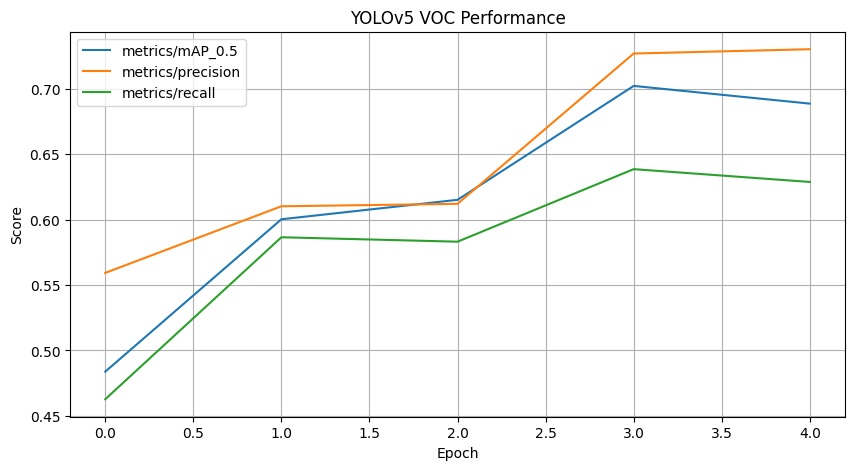

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean
df = pd.read_csv('runs/train/yolov5s_voc2/results.csv')
df.columns = df.columns.str.strip()  # remove all leading/trailing spaces

# Plot selected metrics
df[['metrics/mAP_0.5', 'metrics/precision', 'metrics/recall']].plot(figsize=(10, 5))
plt.title("YOLOv5 VOC Performance")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.grid(True)
plt.show()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

In [18]:
df = pd.read_csv('runs/train/yolov5s_voc2/results.csv')
df.columns = df.columns.str.strip()
df.head()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.074355,0.040330,0.059491,0.55932,0.46264,0.48373,0.24109,0.050261,0.019660,0.033882,0.070084,0.003324,0.003324
1,1,0.053304,0.034705,0.032283,0.61028,0.58657,0.60034,0.29711,0.048201,0.019602,0.020657,0.038766,0.005339,0.005339
2,2,0.050239,0.034295,0.024559,0.61214,0.58319,0.61522,0.33926,0.045716,0.019835,0.016874,0.006128,0.006034,0.006034
3,3,0.045030,0.034704,0.021342,0.72717,0.63869,0.70239,0.41057,0.040726,0.019856,0.014593,0.004060,0.004060,0.004060
4,4,0.043526,0.034504,0.019167,0.73046,0.62890,0.68883,0.40911,0.040146,0.020048,0.014715,0.004060,0.004060,0.004060


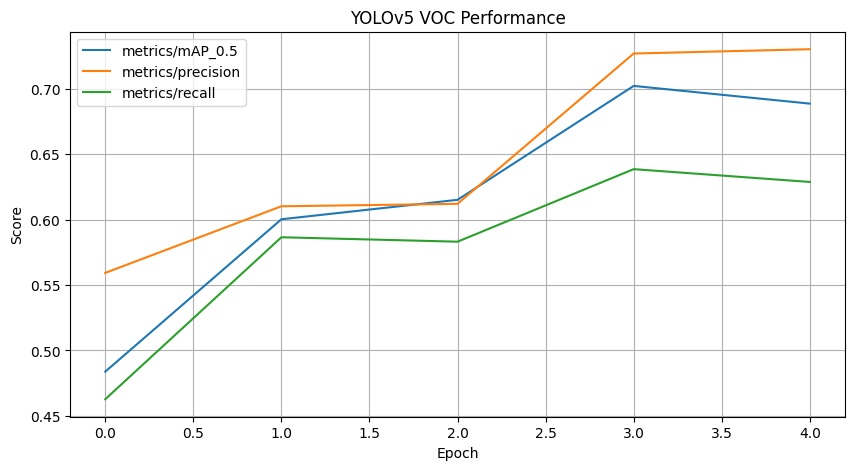

In [19]:
df[['metrics/mAP_0.5', 'metrics/precision', 'metrics/recall']].plot(figsize=(10, 5))
plt.title("YOLOv5 VOC Performance")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.grid(True)
plt.show()

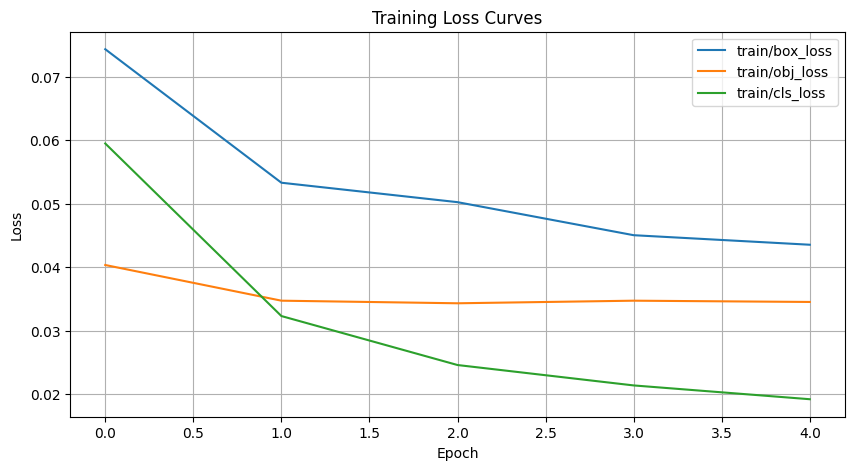

In [20]:
df[['train/box_loss', 'train/obj_loss', 'train/cls_loss']].plot(figsize=(10, 5))
plt.title("Training Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

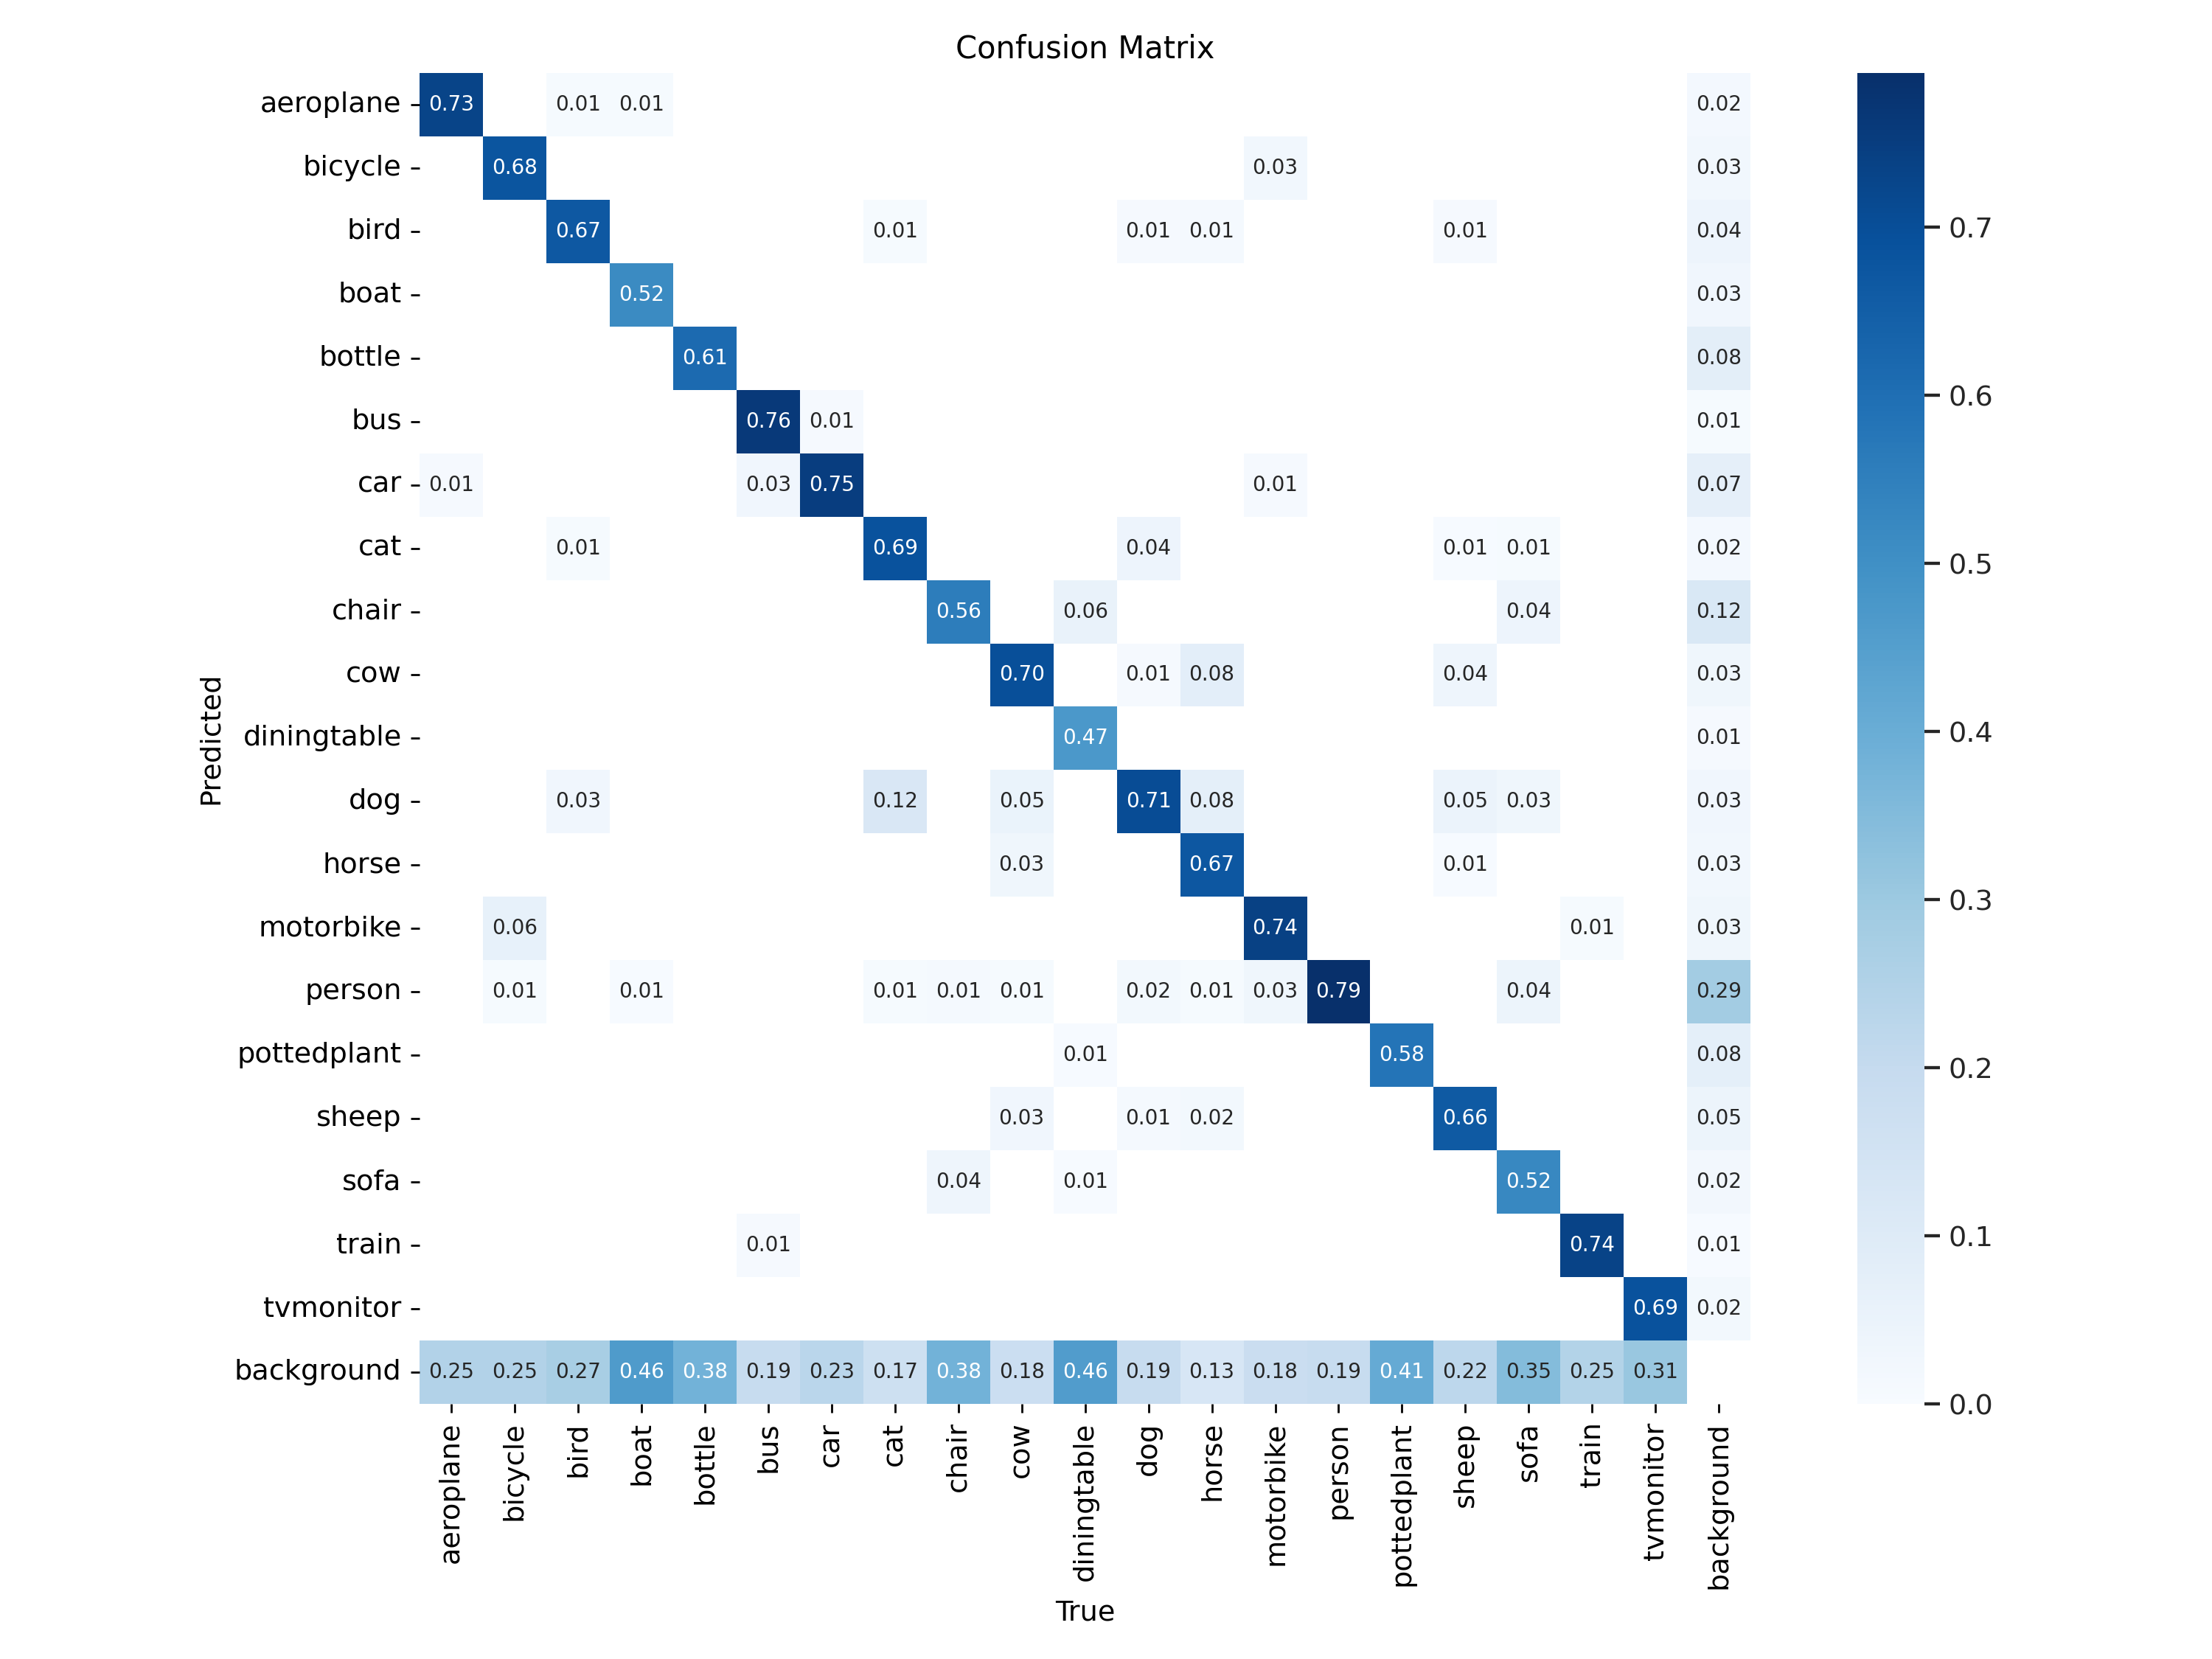

In [21]:
display(Image('runs/train/yolov5s_voc2/confusion_matrix.png'))

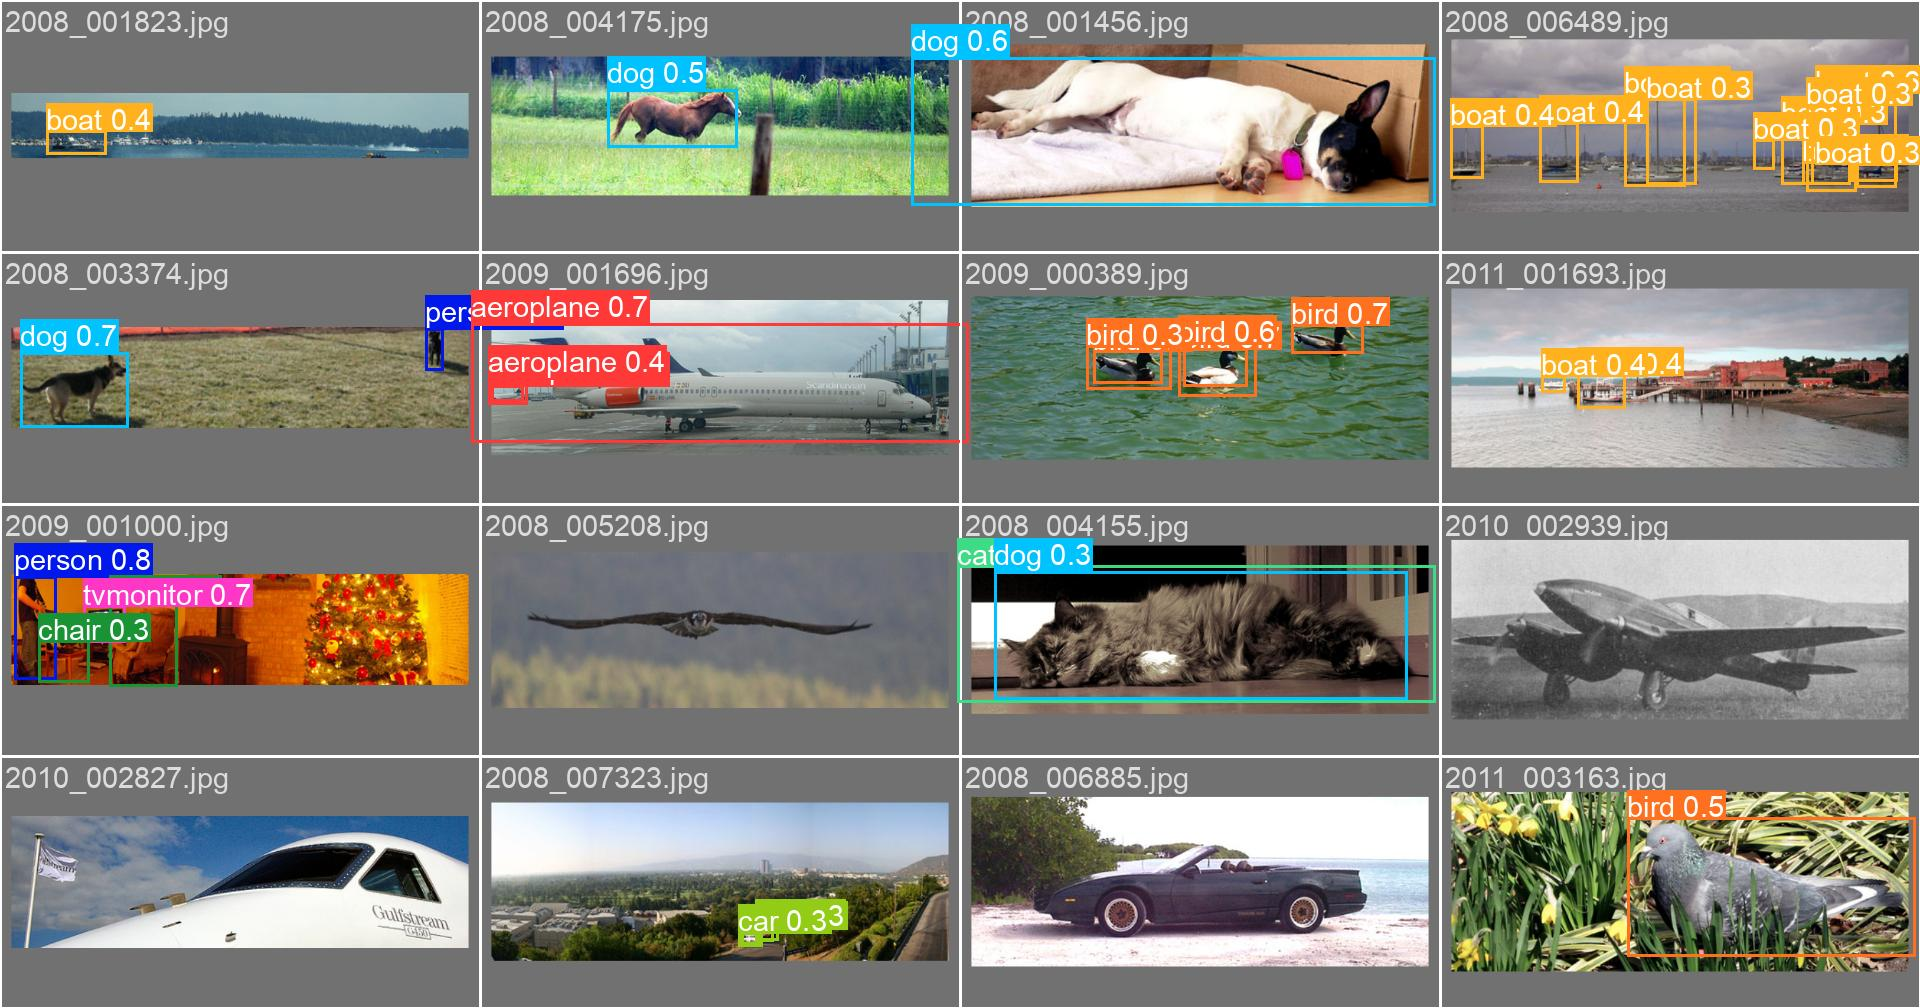

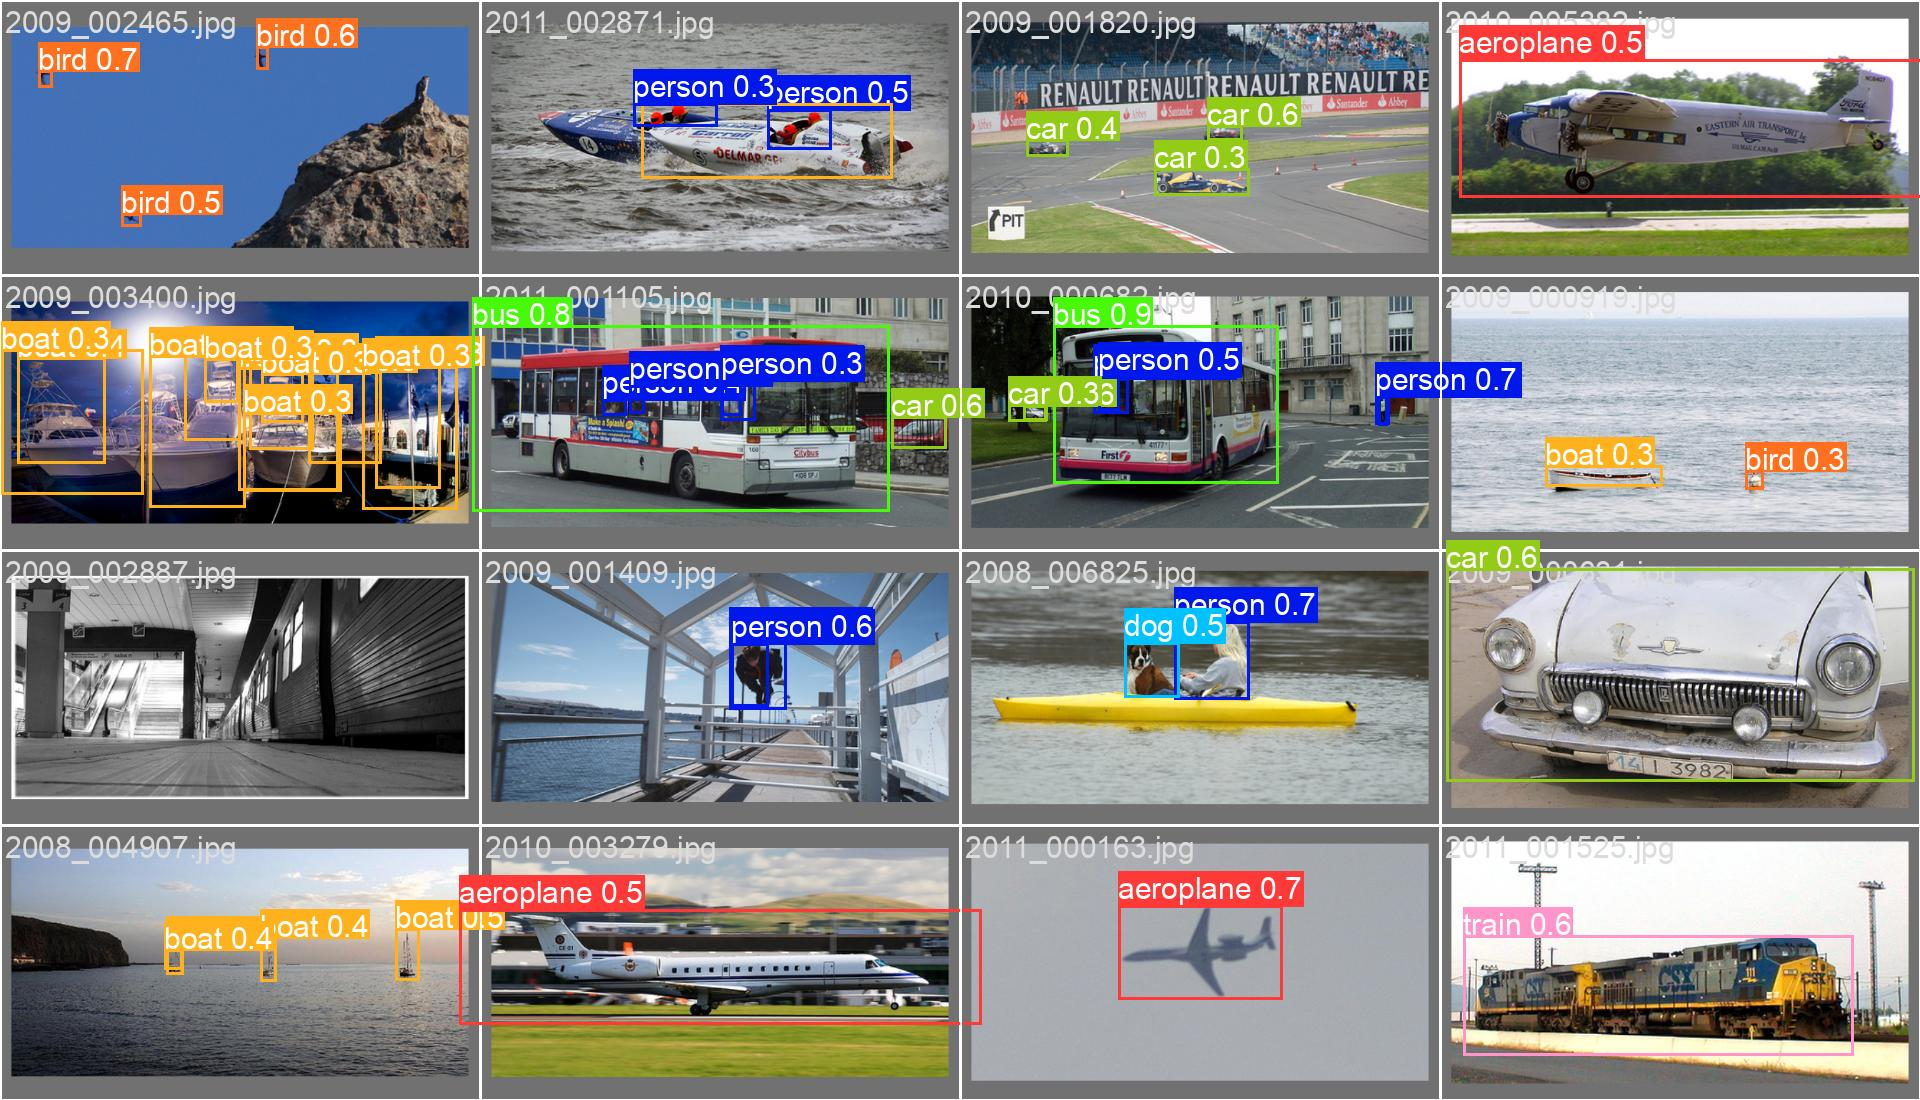

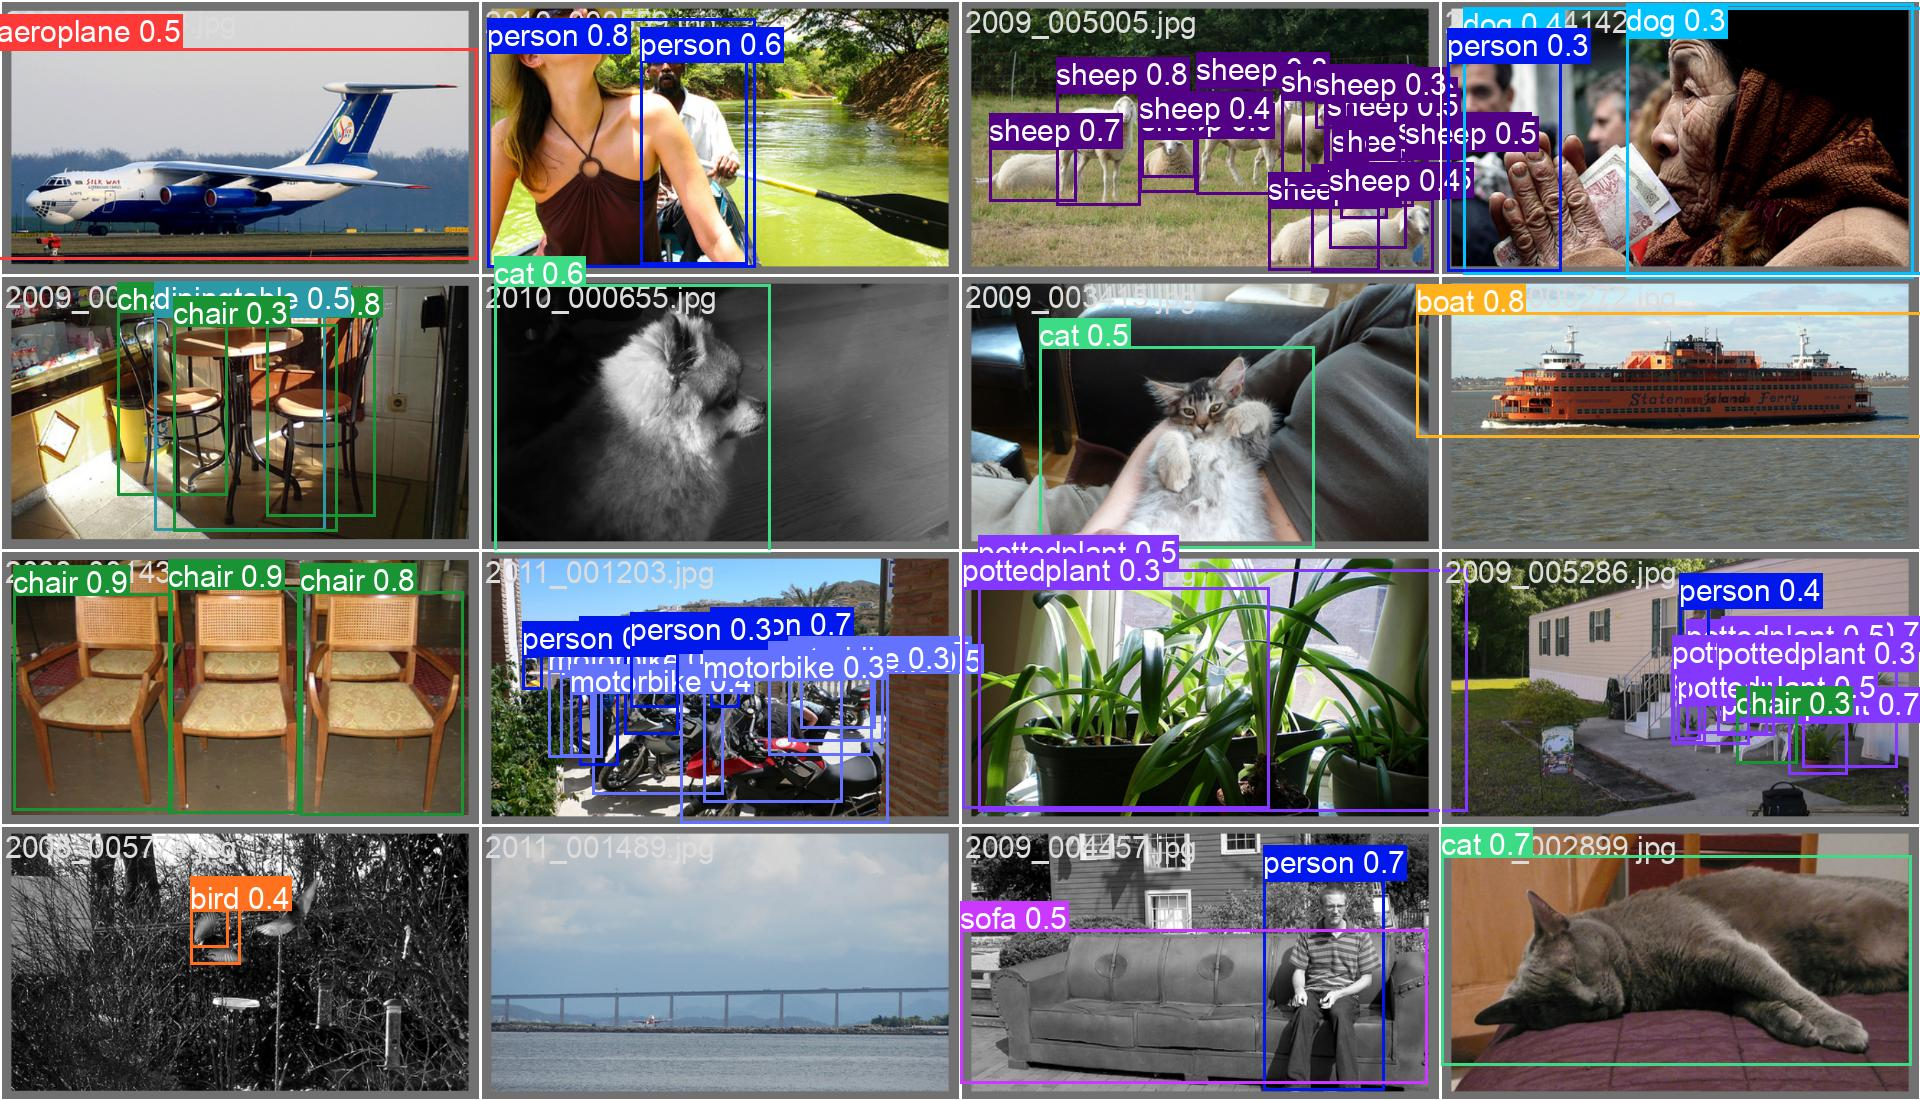

In [22]:
for i in range(3):
    display(Image(f'runs/train/yolov5s_voc2/val_batch{i}_pred.jpg'))